In [1]:
import os
import sys
sys.path += [os.path.dirname(os.getcwd())]

In [2]:
from __future__ import unicode_literals, absolute_import, division, print_function

In [41]:
%reload_ext autoreload
%autoreload 2
from filecluster import file_cluster as fc
from filecluster import utils

import pandas as pd
from datetime import timedelta

In [42]:
config = utils.get_default_config()
df = utils.get_data_from_files(config)
nFiles = len(df)
print("%d files found" % nFiles)

AttributeError: 'module' object has no attribute 'get_data_from_files'

In [36]:
this_config = utils.get_default_config()
image_importer = fc.ImageImporter(this_config)

In [37]:
# image_importer.run()
print('calculating gaps')
image_importer.calculate_gaps('m_date', 'm_date_delta')
image_importer.calculate_gaps('exif_date', 'exif_date_delta')

calculating gaps


In [38]:
print('clustering')
image_importer.do_clustering(method='baseline')
n_files = len(image_importer.df)
print ("%d files found" % n_files)
print('Done')

clustering
24 files found
Done


In [39]:
image_importer.df.head(20)

,exif_date,file_name,full_path,image,m_date,m_date_delta,exif_date_delta,cluster_id
22,2016-08-22 11:14:22,IMG_1510.JPG,/home/izik/fc_data/mix1/IMG_1510.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC66E1750>,2017-02-16 16:28:40,0 days,NaT,0.0
13,2016-08-28 10:42:08,IMG_1569.JPG,/home/izik/fc_data/mix1/IMG_1569.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC658FC50>,2017-02-16 16:28:40,0 days,5 days 23:27:46,1.0
18,2016-08-28 10:42:34,IMG_1572.JPG,/home/izik/fc_data/mix1/IMG_1572.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC66E1BD0>,2017-02-16 16:28:40,0 days,0 days 00:00:26,1.0
9,2016-09-03 07:30:10,IMG_1699.JPG,/home/izik/fc_data/mix1/IMG_1699.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC4D59B90>,2017-02-16 16:28:41,0 days,5 days 20:47:36,2.0
7,2016-10-31 15:12:55,IMG_2152.JPG,/home/izik/fc_data/mix1/IMG_2152.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7FABC4D5BD90>,2017-02-16 16:28:41,0 days,58 days 07:42:45,3.0
1,2016-11-17 12:12:52,IMG_2467.JPG,/home/izik/fc_data/mix1/IMG_2467.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC4D44A50>,2017-02-16 16:28:40,0 days,16 days 20:59:57,4.0
17,2016-11-19 15:43:27,IMG_2477.JPG,/home/izik/fc_data/mix1/IMG_2477.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC4D3CBD0>,2017-02-16 16:28:40,0 days,2 days 03:30:35,5.0
6,2016-11-19 15:45:34,IMG_2479.JPG,/home/izik/fc_data/mix1/IMG_2479.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC4D5B750>,2017-02-16 16:28:40,0 days,0 days 00:02:07,5.0
11,2016-11-20 15:47:26,IMG_2488.JPG,/home/izik/fc_data/mix1/IMG_2488.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC658F410>,2017-02-16 16:28:41,0 days,1 days 00:01:52,6.0
3,2016-11-20 15:47:37,IMG_2489.JPG,/home/izik/fc_data/mix1/IMG_2489.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FABC4D53D90>,2017-02-16 16:28:40,0 days,0 days 00:00:11,6.0


,file_name,image,exif_date,m_date,cluster_id
22,IMG_1510.JPG,,2016-08-22 11:14:22,2017-02-16 16:28:40,0.0
13,IMG_1569.JPG,,2016-08-28 10:42:08,2017-02-16 16:28:40,1.0
18,IMG_1572.JPG,,2016-08-28 10:42:34,2017-02-16 16:28:40,1.0
9,IMG_1699.JPG,,2016-09-03 07:30:10,2017-02-16 16:28:41,2.0
7,IMG_2152.JPG,,2016-10-31 15:12:55,2017-02-16 16:28:41,3.0
1,IMG_2467.JPG,,2016-11-17 12:12:52,2017-02-16 16:28:40,4.0
17,IMG_2477.JPG,,2016-11-19 15:43:27,2017-02-16 16:28:40,5.0
6,IMG_2479.JPG,,2016-11-19 15:45:34,2017-02-16 16:28:40,5.0
11,IMG_2488.JPG,,2016-11-20 15:47:26,2017-02-16 16:28:41,6.0
3,IMG_2489.JPG,,2016-11-20 15:47:37,2017-02-16 16:28:40,6.0

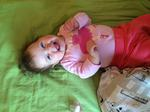
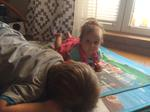
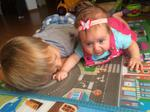
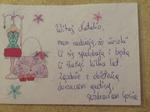
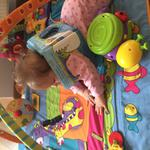
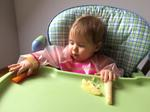
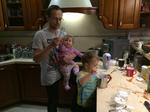
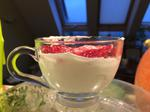
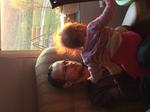
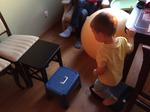
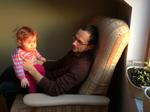
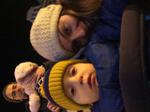
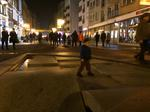
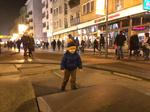
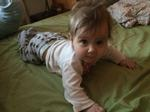
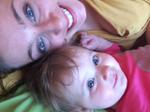
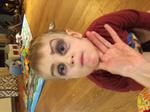
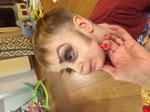
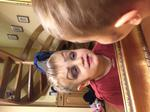
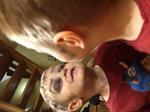
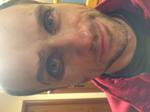
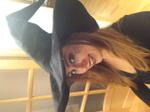
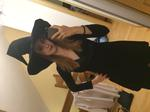
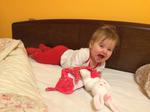

In [40]:
HTML(image_importer.df[['file_name','image','exif_date','m_date','cluster_id']].to_html(formatters={'image': image_formatter}, escape=False))

In [17]:
dogs['image'] = dogs.file.map(lambda f: get_thumbnail(f))
dogs.head()

In [17]:
from IPython.core.display import display, HTML
from PIL import Image
import cStringIO
import base64
import pandas as pd

img = Image.open("/home/izik/Pictures/Superman.png")
img_buffer = cStringIO.StringIO()
img.save(img_buffer, format="PNG")
imgStr = base64.b64encode(img_buffer.getvalue())

data = pd.DataFrame({"A":[1,2,3,4,5], "B":[10,20,30,40,50]})

# superman global
#data.loc[:,'img'] = '<img src="data:image/png;base64,{0:s}" width=100>'
#html_all = data.to_html(escape=False).format(imgStr)

data.loc[:,'img'] = '<img src="data:image/png;base64,{0:s}" width=100>'.format(imgStr)
html_all = data.to_html(escape=False)

#data.loc[:,'img'] = '<img src="data:image/png;base64,{}">'.format(imgStr)
#html_all = data.to_html(escape=False)

#display(HTML(html_all))
html_all

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>A</th>\n      <th>B</th>\n      <th>img</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>10</td>\n      <td><img src="data:image/png;base64,iVBORw0KGgoAAA...</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>20</td>\n      <td><img src="data:image/png;base64,iVBORw0KGgoAAA...</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>30</td>\n      <td><img src="data:image/png;base64,iVBORw0KGgoAAA...</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>4</td>\n      <td>40</td>\n      <td><img src="data:image/png;base64,iVBORw0KGgoAAA...</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>5</td>\n      <td>50</td>\n      <td><img src="data:image/png;base64,iVBORw0KGgoAAA...</td>\n    </tr>\n  </tbody>\n</table>'

In [13]:
data

,A,B,img
0,1,10,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
1,2,20,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
2,3,30,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3,4,40,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
4,5,50,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [6]:
df.dtypes

exif_date    datetime64[ns]
file_name            object
m_date       datetime64[ns]
dtype: object

In [7]:
td = timedelta(minutes=60)
cluster_idx = 0

for index, row in df.iterrows():
    d_previous = df.loc[index]['delta_from_previous']
    if d_previous > td:
        cluster_idx += 1
    df.loc[index,('cluster_id')] = cluster_idx
df

KeyError: u'delta_from_previous'

In [61]:
df

,creation_date,file_name,delta_from_previous,"(6, cluster_id)","(19, cluster_id)","(5, cluster_id)","(15, cluster_id)","(7, cluster_id)","(10, cluster_id)","(12, cluster_id)",...,"(0, cluster_id)","(18, cluster_id)","(9, cluster_id)","(17, cluster_id)","(14, cluster_id)","(2, cluster_id)","(1, cluster_id)","(4, cluster_id)","(3, cluster_id)",cluster_id
6,2012-10-11 06:52:13,_MG_2268.jpg,NaT,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,0.0
19,2012-10-11 06:52:22,_MG_2280.jpg,0 days 00:00:09,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,0.0
5,2012-10-11 06:52:30,_MG_2285.jpg,0 days 00:00:08,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,0.0
15,2012-10-11 06:52:39,_MG_2290.jpg,0 days 00:00:09,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,0.0
7,2012-10-11 06:52:45,_MG_2304.jpg,0 days 00:00:06,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,0.0
10,2012-10-11 06:52:54,_MG_2312.jpg,0 days 00:00:09,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,0.0
12,2013-01-13 10:31:20,_MG_3488.jpg,94 days 03:38:26,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,1.0
16,2013-01-13 10:31:31,_MG_3489.jpg,0 days 00:00:11,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,1.0
11,2013-01-13 10:31:37,_MG_3492.jpg,0 days 00:00:06,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,1.0
13,2013-01-13 10:31:48,_MG_3496.jpg,0 days 00:00:11,0,0,0,0,0,0,1,...,2,2,2,2,2,2,3,3,3,1.0
